In [54]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [58]:
df = pd.read_csv('gld_price_data.csv')

In [59]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [60]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [62]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

C:\Users\mspra\AppData\Local\Temp\ipykernel_18016\2141170081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color = "blue")


<Axes: xlabel='GLD', ylabel='Density'>

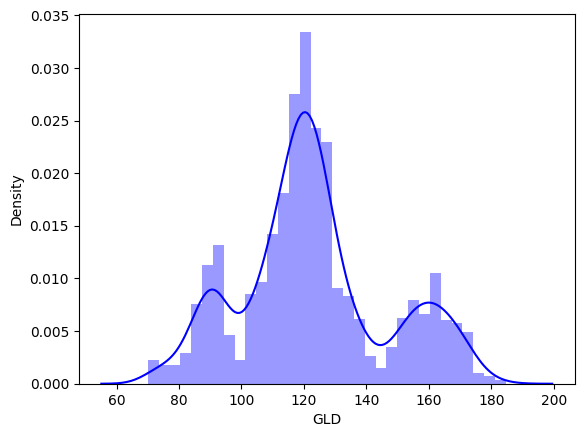

In [63]:
sns.distplot(df['GLD'], color = "blue")

In [64]:
X = df.drop(['GLD', 'Date'], axis = 1)
Y = df['GLD']

In [65]:
X1 = df['SLV']

In [66]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
y = Y.values.reshape(-1,1)
x = X1.values.reshape(-1,1)

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

In [70]:
reg = LinearRegression()

In [71]:
reg.fit(X_train,Y_train)

LinearRegression()

In [72]:
reg.intercept_, reg.coef_

(array([65.73857511]), array([[2.83176137]]))

In [73]:
Y_pred = reg.predict(X_test)

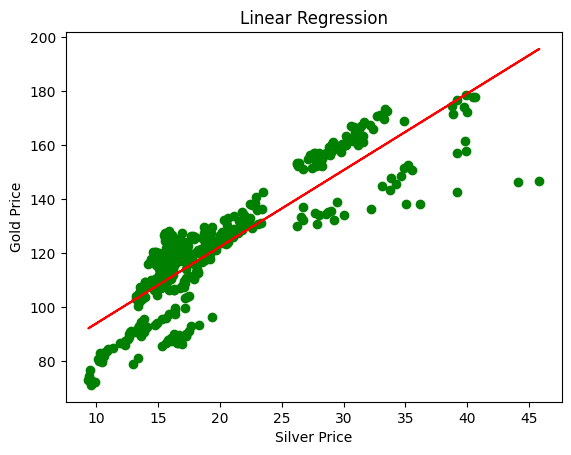

In [74]:
plt.scatter(X_test,Y_test, label = "Data points", color = "green")
plt.plot(X_test, Y_pred,color='red') 
plt.xlabel("Silver Price")
plt.ylabel("Gold Price")
plt.title("Linear Regression")
plt.show
plt.savefig("./images/linear_regression_prediction.png")

In [75]:
r2 = r2_score(Y_test,Y_pred)
print("R squared error : ", r2)

R squared error :  0.7727920901350842


# Multilinear regression

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [77]:
reg.fit(X_train,Y_train)

LinearRegression()

In [78]:
reg.intercept_, reg.coef_

(71.45275336012236,
 array([ 6.44718511e-03, -2.46362169e-01,  3.12316030e+00, -1.11875839e+01]))

In [79]:
Y_pred = reg.predict(X_test)

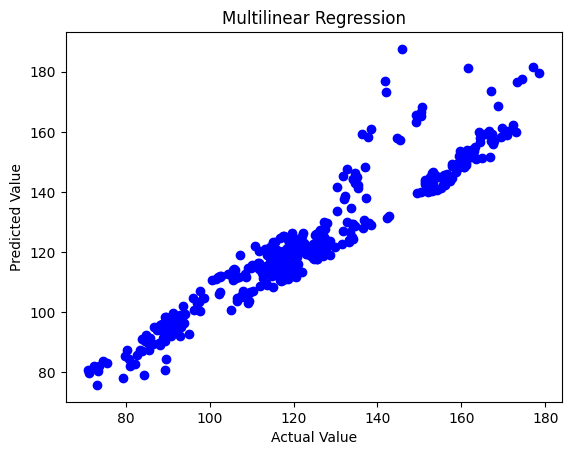

In [80]:
plt.scatter(Y_test,Y_pred, label = "Data points", color = "blue")
plt.title("Multilinear Regression")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.savefig("./images/multilinear_regression_prediction.png")

In [81]:
r2 = r2_score(Y_test,Y_pred)
print("R squared error : ", r2)

R squared error :  0.8966890176012663


# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeRegressor 

In [83]:
regressor = DecisionTreeRegressor(random_state = 0) 

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [85]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [86]:
y_pred = regressor.predict(X_test)

In [87]:
Y_test = list(Y_test)

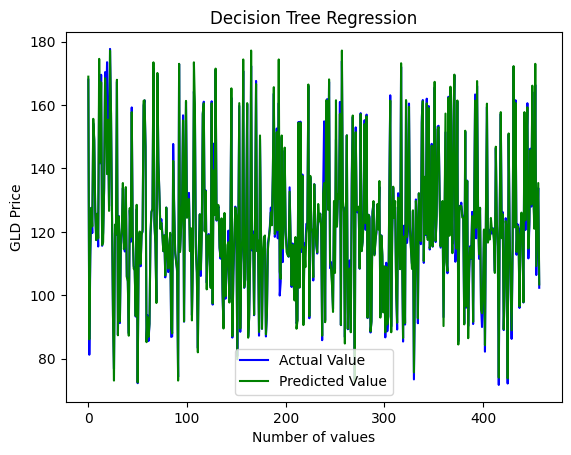

In [88]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Decision Tree Regression')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.savefig("./images/decision_tree_regression_prediction.png")
plt.show()

In [89]:
error_score = r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9854190298916252


# Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [92]:
regressor = RandomForestRegressor(n_estimators=100)

In [93]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [94]:
test_data_prediction = regressor.predict(X_test)

In [95]:
Y_test = list(Y_test)

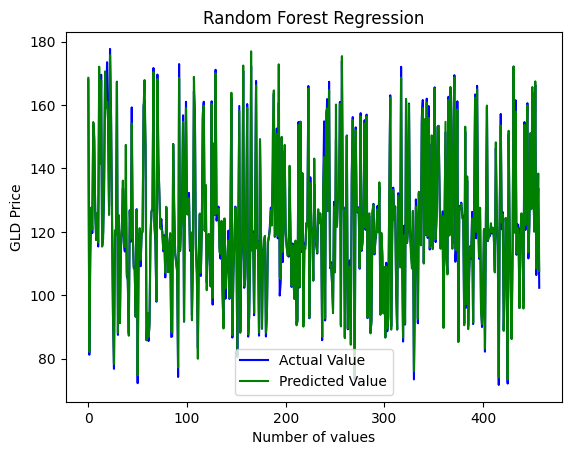

In [96]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Random Forest Regression')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.savefig("./images/random_forest_regression_prediction.png")
plt.show()

In [97]:
error_score = r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892990633284995
